In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

x_train, y_train = cifar10.load_data()[0]
x_test, y_test = cifar10.load_data()[1]

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [5]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAvgPool2D


vgg = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
x = vgg.output
x = GlobalAvgPool2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(10, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=x)

for layer in vgg.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [6]:
vgg_history = model.fit(
	x_train,
	y_train,
	epochs=10,
  batch_size=32,
	validation_data=(x_test, y_test)
)

Epoch 1/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.3411 - accuracy: 0.5295 - val_loss: 1.2316 - val_accuracy: 0.5658
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1751 - accuracy: 0.5843 - val_loss: 1.1606 - val_accuracy: 0.5877
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1090 - accuracy: 0.6099 - val_loss: 1.1269 - val_accuracy: 0.6048
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0594 - accuracy: 0.6264 - val_loss: 1.1186 - val_accuracy: 0.6130
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0131 - accuracy: 0.6410 - val_loss: 1.1161 - val_accuracy: 0.6119
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9800 - accuracy: 0.6564 - val_loss: 1.0898 - val_accuracy: 0.6225
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9426 - accuracy: 0.6662 - val_loss: 1.1031 -

313/313 [==============================] - 2s 7ms/step


<ipython-input-7-5a69cdfd5acb>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, i + 1)


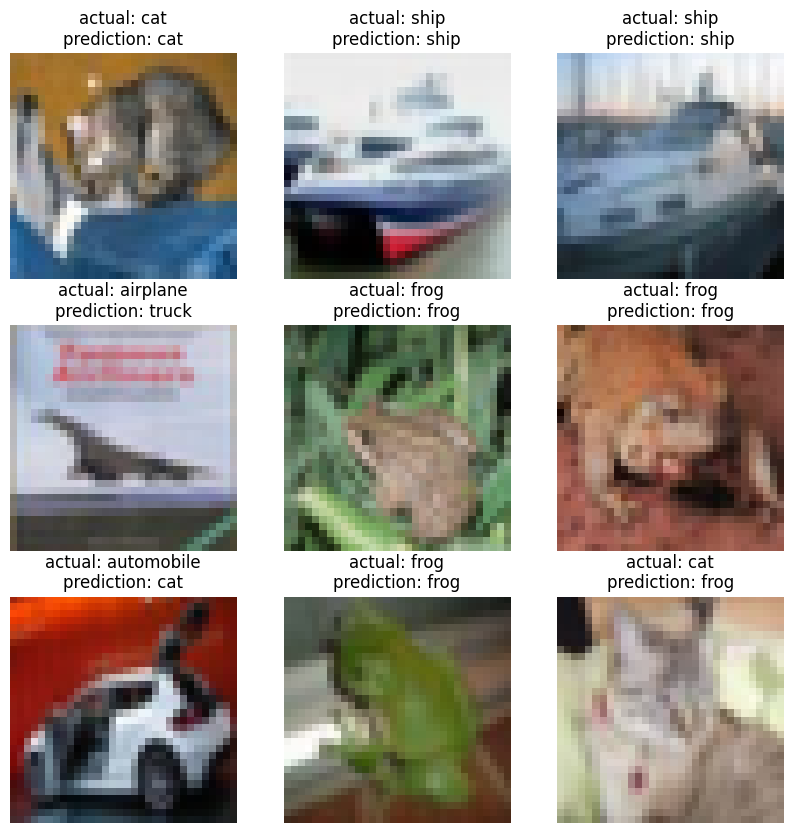

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_predictions(model, x_test, y_test, class_names):
    preds = model.predict(x_test)
    fig = plt.subplots(1, 5, figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(x_test[i])
        pred_label = class_names[np.argmax(preds[i])]
        true_label = class_names[np.argmax(y_test[i])]
        plt.title(f'actual: {true_label}\nprediction: {pred_label}')
        plt.axis('off')

    plt.show()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
visualize_predictions(model, x_test, y_test, class_names)